<a href="https://colab.research.google.com/github/TopcuAbdulbaki/PhyshionetSleepStageClassification/blob/main/Sleep_phsiyonet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 90.6 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
from mne.datasets.sleep_physionet.age import fetch_data

# 1. Hangi denekleri indireceğimizi seçelim (0'dan 19'a kadar ilk 20 denek)
# Hepsini yapmak isterseniz range(83) yapabilirsiniz ama Colab RAM'i yetmeyebilir.
subjects = range(20)
all_X = []
all_y = []

# Uyku evrelerini sayısal değerlere eşleme
mapping = {
    'Sleep stage W': 0,
    'Sleep stage 1': 1,
    'Sleep stage 2': 2,
    'Sleep stage 3': 3,
    'Sleep stage 4': 3, # N3 ve N4 birleştirilir
    'Sleep stage R': 4
}

for sub in subjects:
    try:
        print(f"İşleniyor: Denek {sub}...")
        # Veriyi çek (1. gece kaydı)
        [data_files] = fetch_data(subjects=[sub], recording=[1])

        # Oku
        raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
        annot = mne.read_annotations(data_files[1])
        raw.set_annotations(annot, emit_warning=False)

        # Ön İşleme: Kanal seçimi ve Filtreleme
        raw.pick_channels(['EEG Fpz-Cz'])
        raw.filter(0.5, 30.0, fir_design='firwin', verbose=False)

        # 30 saniyelik epochlara bölme
        events, _ = mne.events_from_annotations(
            raw, event_id=mapping, chunk_duration=30., verbose=False)

        tmax = 30. - 1. / raw.info['sfreq']
        epochs = mne.Epochs(raw=raw, events=events, event_id=mapping,
                          tmin=0., tmax=tmax, baseline=None, preload=True, verbose=False)

        # Verileri listeye ekle
        all_X.append(epochs.get_data())
        all_y.append(epochs.events[:, 2])

    except Exception as e:
        print(f"Denek {sub} atlandı. Hata: {e}")

# 2. Tüm listeleri dev bir Numpy dizisine dönüştür
X = np.concatenate(all_X, axis=0)
y = np.concatenate(all_y, axis=0)

# 3. Normalizasyon (Z-Score)
X = (X - np.mean(X)) / np.std(X)

print("\n--- İşlem Tamamlandı ---")
print(f"Toplam Veri Büyüklüğü (X): {X.shape}") # (Örnek Sayısı, 1, 3000)
print(f"Toplam Etiket Sayısı (y): {y.shape}")

İşleniyor: Denek 0...
Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating /root/mne_data


100%|█████████████████████████████████████| 48.3M/48.3M [00:00<00:00, 73.5GB/s]
100%|█████████████████████████████████████| 4.62k/4.62k [00:00<00:00, 8.66MB/s]

Download complete in 03m03s (46.1 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 1...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.1M/51.1M [00:00<00:00, 68.1GB/s]
100%|█████████████████████████████████████| 3.90k/3.90k [00:00<00:00, 8.76MB/s]

Download complete in 02m22s (48.7 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 2...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.1M/51.1M [00:00<00:00, 84.8GB/s]
100%|█████████████████████████████████████| 4.80k/4.80k [00:00<00:00, 7.37MB/s]

Download complete in 01m59s (48.8 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 3...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.4M/51.4M [00:00<00:00, 64.1GB/s]
100%|█████████████████████████████████████| 3.70k/3.70k [00:00<00:00, 5.54MB/s]

Download complete in 02m58s (49.1 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 4...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 46.9M/46.9M [00:00<00:00, 61.7GB/s]
100%|█████████████████████████████████████| 4.83k/4.83k [00:00<00:00, 11.2MB/s]

Download complete in 02m50s (44.7 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 5...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 80.4GB/s]
100%|█████████████████████████████████████| 3.98k/3.98k [00:00<00:00, 8.32MB/s]

Download complete in 02m56s (47.4 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 6...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.5M/50.5M [00:00<00:00, 72.7GB/s]
100%|█████████████████████████████████████| 2.62k/2.62k [00:00<00:00, 5.83MB/s]

Download complete in 03m06s (48.2 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 7...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.3M/51.3M [00:00<00:00, 70.5GB/s]
100%|█████████████████████████████████████| 3.63k/3.63k [00:00<00:00, 4.82MB/s]

Download complete in 02m00s (48.9 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 8...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.0M/51.0M [00:00<00:00, 75.0GB/s]
100%|█████████████████████████████████████| 4.31k/4.31k [00:00<00:00, 9.08MB/s]

Download complete in 02m38s (48.6 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 9...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 49.8M/49.8M [00:00<00:00, 66.6GB/s]
100%|█████████████████████████████████████| 4.47k/4.47k [00:00<00:00, 7.35MB/s]

Download complete in 01m54s (47.5 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 10...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 49.6M/49.6M [00:00<00:00, 75.9GB/s]
100%|█████████████████████████████████████| 2.22k/2.22k [00:00<00:00, 4.52MB/s]

Download complete in 03m01s (47.3 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 11...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 48.2M/48.2M [00:00<00:00, 97.3GB/s]
100%|█████████████████████████████████████| 3.88k/3.88k [00:00<00:00, 7.62MB/s]

Download complete in 02m45s (46.0 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 12...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.8M/50.8M [00:00<00:00, 78.9GB/s]
100%|█████████████████████████████████████| 4.01k/4.01k [00:00<00:00, 8.21MB/s]

Download complete in 02m00s (48.5 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 13...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 51.3M/51.3M [00:00<00:00, 78.5GB/s]
100%|█████████████████████████████████████| 4.44k/4.44k [00:00<00:00, 8.70MB/s]

Download complete in 03m08s (49.0 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 14...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.3M/50.3M [00:00<00:00, 79.7GB/s]
100%|█████████████████████████████████████| 3.77k/3.77k [00:00<00:00, 6.46MB/s]

Download complete in 01m53s (47.9 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 15...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 47.8M/47.8M [00:00<00:00, 65.1GB/s]
100%|█████████████████████████████████████| 3.16k/3.16k [00:00<00:00, 6.71MB/s]

Download complete in 03m00s (45.6 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 16...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 47.9M/47.9M [00:00<00:00, 78.8GB/s]
100%|█████████████████████████████████████| 4.66k/4.66k [00:00<00:00, 7.68MB/s]

Download complete in 03m08s (45.7 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 17...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.0M/50.0M [00:00<00:00, 69.0GB/s]
100%|█████████████████████████████████████| 5.38k/5.38k [00:00<00:00, 6.76MB/s]

Download complete in 02m42s (47.7 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 18...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.3M/50.3M [00:00<00:00, 73.0GB/s]
100%|█████████████████████████████████████| 4.81k/4.81k [00:00<00:00, 10.3MB/s]

Download complete in 02m07s (47.9 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
İşleniyor: Denek 19...
Using default location ~/mne_data for PHYSIONET_SLEEP...


100%|█████████████████████████████████████| 50.6M/50.6M [00:00<00:00, 81.6GB/s]
100%|█████████████████████████████████████| 5.28k/5.28k [00:00<00:00, 8.45MB/s]

Download complete in 03m30s (48.3 MB)



/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)
/tmp/ipython-input-616056188.py:28: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data_files[0], preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).

--- İşlem Tamamlandı ---
Toplam Veri Büyüklüğü (X): (54587, 1, 3000)
Toplam Etiket Sayısı (y): (54587,)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input, backend as K
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize


In [ ]:
# --- 1. VERİ ŞEKLİNİ DÜZENLEME (MNE -> KERAS) ---
# Mevcut X: (Örnek Sayısı, 1, 3000) -> Hedef: (Örnek Sayısı, 3000, 1)
# Keras Conv1D zaman ekseninin ortada olmasını ister.
if X.shape[1] == 1:
    X = np.moveaxis(X, 1, 2)

print(f"Model için hazırlanan veri boyutu: {X.shape}")

Model için hazırlanan veri boyutu: (54587, 3000, 1)


In [ ]:
# --- 2. VERİ BÖLME (TRAIN / VAL / TEST) ---
# %70 Eğitim, %15 Doğrulama, %15 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42, stratify=y_train) # 0.176 * 0.85 ~= 0.15

In [ ]:

# --- 3. SINIF AĞIRLIKLARI (Dengesiz Veri İçin) ---
classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}
print(f"Sınıf Ağırlıkları: {class_weight_dict}")

Sınıf Ağırlıkları: {np.int64(0): np.float64(0.29182855616197856), np.int64(1): np.float64(8.808986175115207), np.int64(2): np.float64(1.1865611421477342), np.int64(3): np.float64(3.6619731800766284), np.int64(4): np.float64(2.9073003802281367)}


In [ ]:

# Sınıf İsimleri
class_names = ['Uyanık (W)', 'Evre 1 (N1)', 'Evre 2 (N2)', 'Evre 3 (N3)', 'REM (R)']
n_classes = len(class_names)
y_test_bin = label_binarize(y_test, classes=range(n_classes)) # ROC için

In [ ]:

# --- 4. MODEL MİMARİLERİ ---

def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=50, strides=6, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=8, strides=8),
        layers.Dropout(0.3),
        layers.Conv1D(128, kernel_size=8, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=4, strides=4),
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name="1D-CNN")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_lstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=16, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=4)(x)
    x = layers.Conv1D(128, kernel_size=8, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=4)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs, name="CNN-LSTM")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_gru_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(32, kernel_size=64, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=4)(x)
    x = layers.Conv1D(64, kernel_size=32, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=4)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs, name="CNN-BiGRU")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


##############################
MODEL BAŞLATILIYOR: 1D-CNN
##############################


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.7464 - loss: 0.8566 - val_accuracy: 0.8215 - val_loss: 0.4800
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8649 - loss: 0.5569 - val_accuracy: 0.8735 - val_loss: 0.3768
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8733 - loss: 0.5330 - val_accuracy: 0.8794 - val_loss: 0.3625
Epoch 4/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.5208 - val_accuracy: 0.9062 - val_loss: 0.2809
Epoch 5/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8837 - loss: 0.5082 - val_accuracy: 0.8784 - val_loss: 0.3276
Epoch 6/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8881 - loss: 0.4942 - val_accuracy: 0.8665 - val_loss: 0.4323
Epoch 7/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8856 - loss: 0.4936 - val_accuracy: 0.9041 - val_loss: 0.2839
Epoch 8/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8919 - loss: 0.4502 - val_accuracy: 

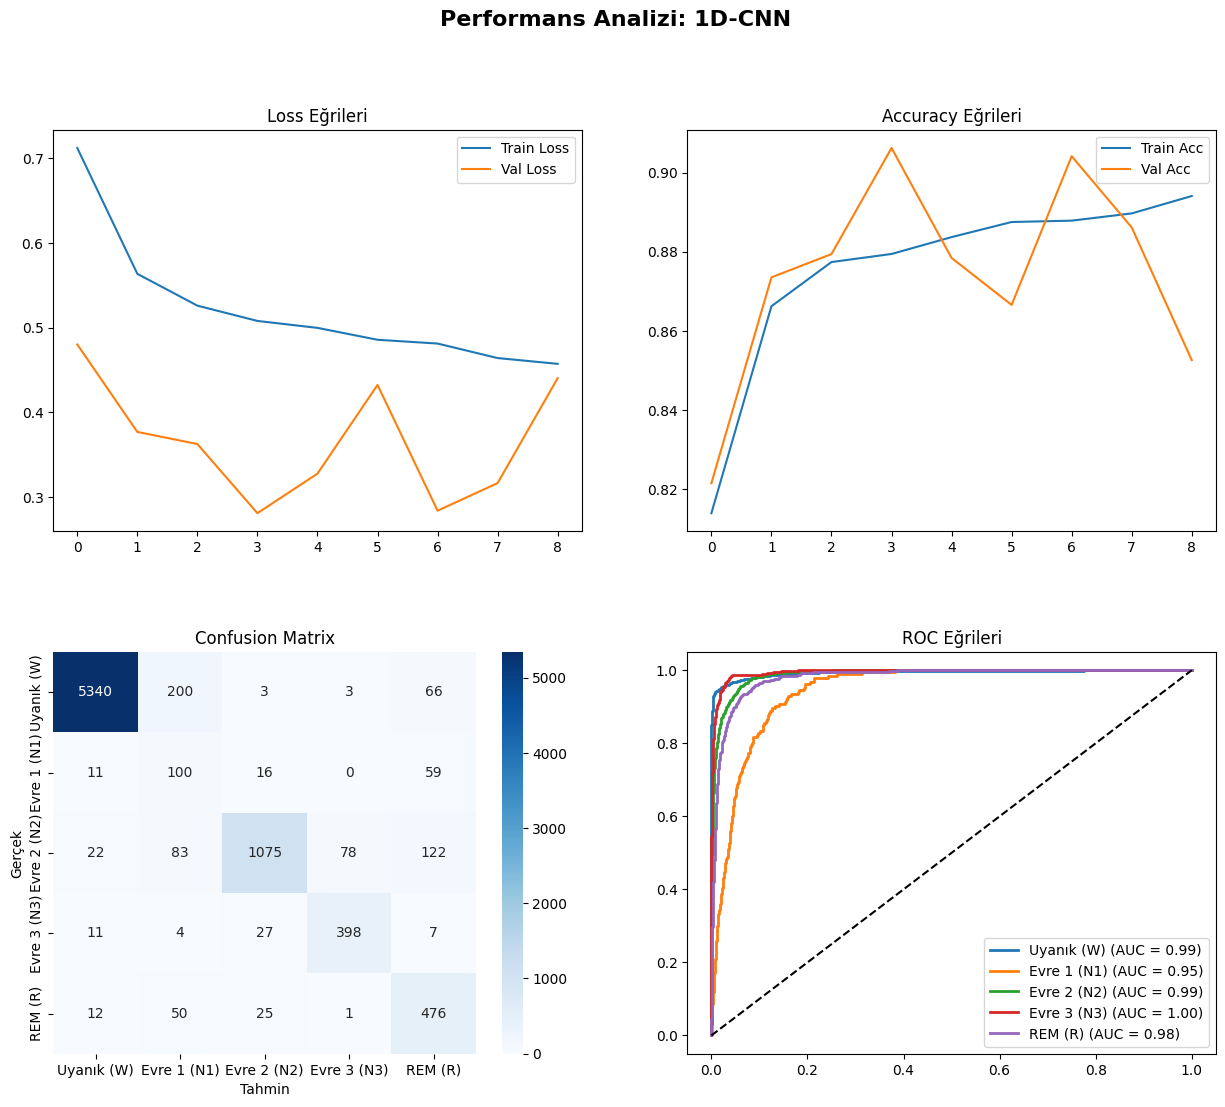

              precision    recall  f1-score   support

  Uyanık (W)       0.99      0.95      0.97      5612
 Evre 1 (N1)       0.23      0.54      0.32       186
 Evre 2 (N2)       0.94      0.78      0.85      1380
 Evre 3 (N3)       0.83      0.89      0.86       447
     REM (R)       0.65      0.84      0.74       564

    accuracy                           0.90      8189
   macro avg       0.73      0.80      0.75      8189
weighted avg       0.93      0.90      0.91      8189


##############################
MODEL BAŞLATILIYOR: CNN-LSTM
##############################
Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6062 - loss: 1.1386 - val_accuracy: 0.7246 - val_loss: 0.9963
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7800 - loss: 0.8324 - val_accuracy: 0.8357 - val_loss: 0.4833
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8574 - loss: 0.6590 - val_accuracy: 0.8814 - val_loss: 0.3358
Epoch 4/20
598/598 ━━━━━━━━━━━━

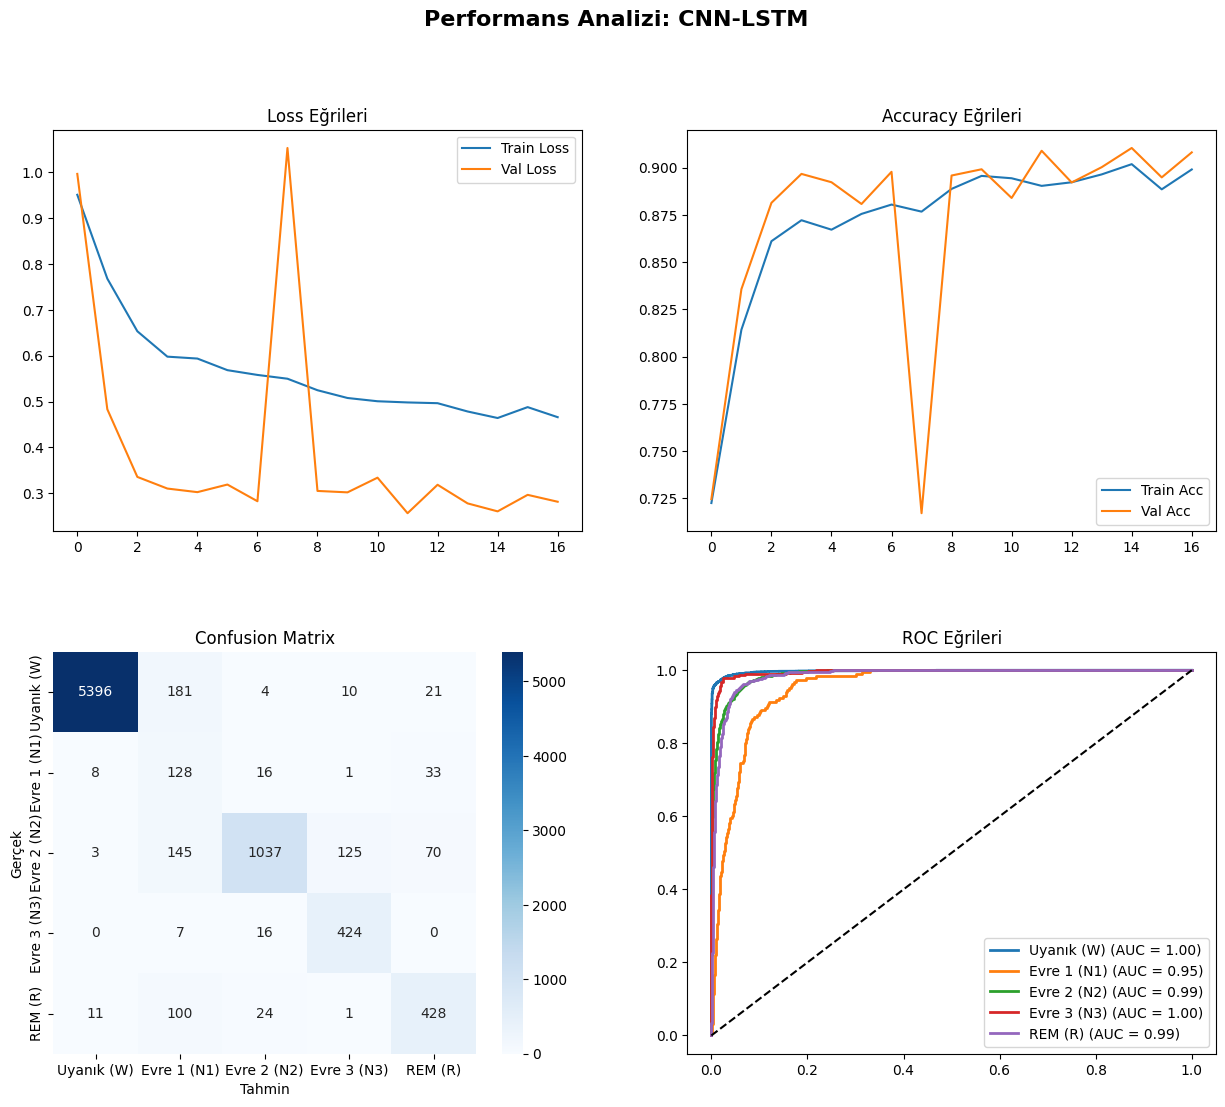

              precision    recall  f1-score   support

  Uyanık (W)       1.00      0.96      0.98      5612
 Evre 1 (N1)       0.23      0.69      0.34       186
 Evre 2 (N2)       0.95      0.75      0.84      1380
 Evre 3 (N3)       0.76      0.95      0.84       447
     REM (R)       0.78      0.76      0.77       564

    accuracy                           0.91      8189
   macro avg       0.74      0.82      0.75      8189
weighted avg       0.94      0.91      0.92      8189


##############################
MODEL BAŞLATILIYOR: CNN-BiGRU
##############################
Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6880 - loss: 0.8781 - val_accuracy: 0.8793 - val_loss: 0.3767
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8743 - loss: 0.5591 - val_accuracy: 0.8885 - val_loss: 0.3119
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8843 - loss: 0.5350 - val_accuracy: 0.8967 - val_loss: 0.2929
Epoch 4/20
598/598 ━━━━━━━━━━━

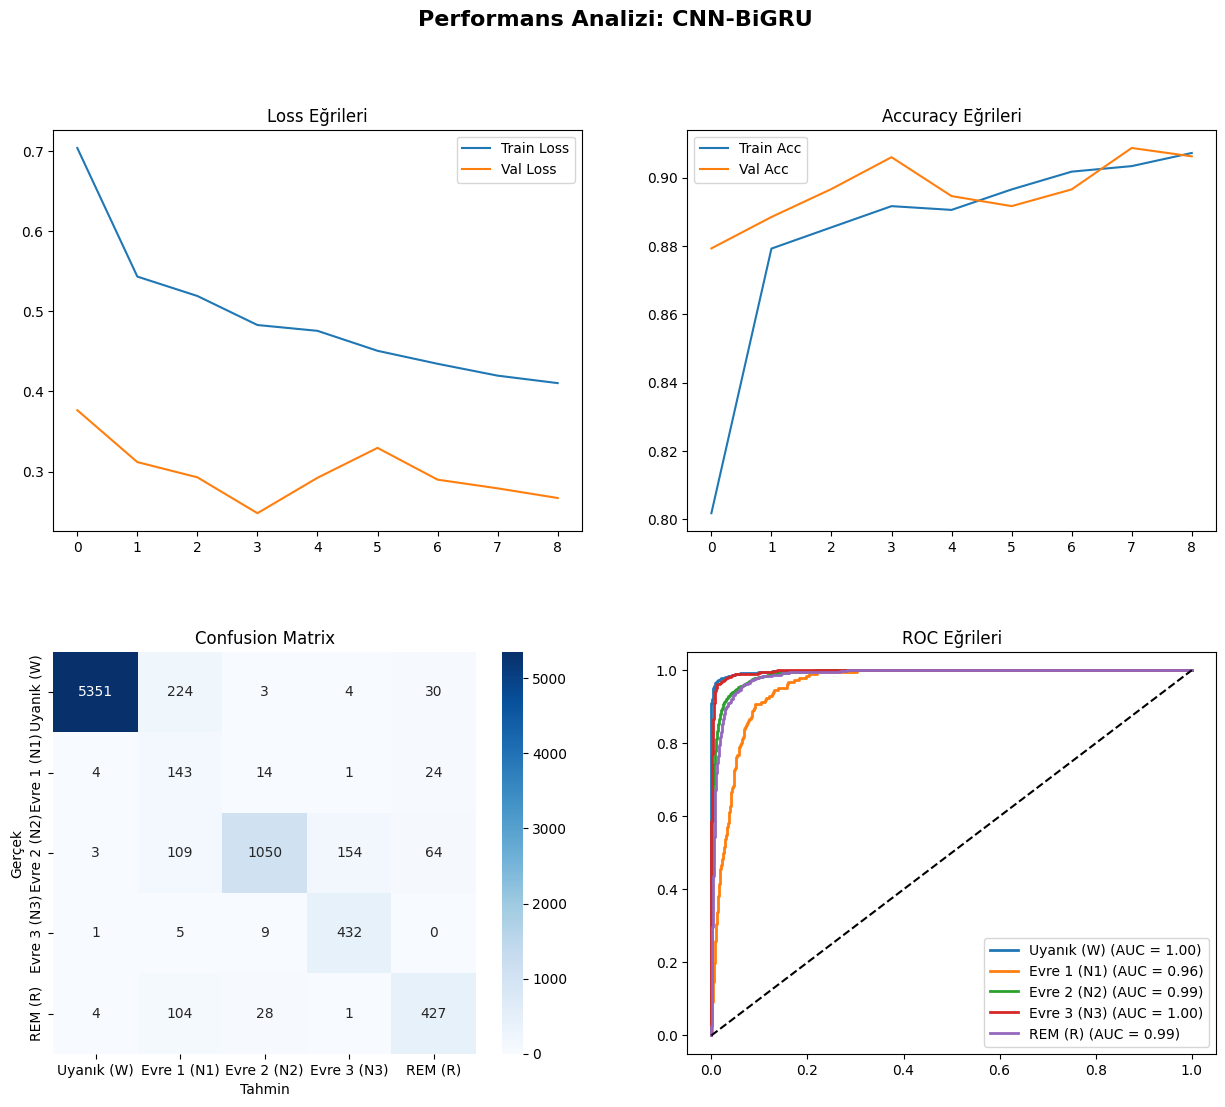

              precision    recall  f1-score   support

  Uyanık (W)       1.00      0.95      0.98      5612
 Evre 1 (N1)       0.24      0.77      0.37       186
 Evre 2 (N2)       0.95      0.76      0.85      1380
 Evre 3 (N3)       0.73      0.97      0.83       447
     REM (R)       0.78      0.76      0.77       564

    accuracy                           0.90      8189
   macro avg       0.74      0.84      0.76      8189
weighted avg       0.94      0.90      0.92      8189



In [ ]:

# --- 5. EĞİTİM VE ANALİZ DÖNGÜSÜ ---

model_functions = {
    "1D-CNN": build_cnn_model,
    "CNN-LSTM": build_cnn_lstm_model,
    "CNN-BiGRU": build_cnn_gru_model
}

comparison_table = []
input_shape = (3000, 1)

for name, model_func in model_functions.items():
    print(f"\n{'#'*30}\nMODEL BAŞLATILIYOR: {name}\n{'#'*30}")

    # Bellek Temizliği (Colab RAM'i korumak için)
    K.clear_session()

    model = model_func(input_shape, n_classes)

    # Erken Durdurma (Overfitting önlemek için)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Eğitim
    history = model.fit(
        X_train, y_train,
        epochs=20, # İdeal sonuç için artırılabilir (örn: 30-50)
        batch_size=2048,
        validation_data=(X_val, y_val),
        class_weight=class_weight_dict,
        callbacks=[early_stop],
        verbose=1
    )

    # Tahminler
    print(f"{name} için test tahminleri yapılıyor...")
    y_pred_proba = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_proba, axis=1)

    # Metrikler
    acc = accuracy_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    comparison_table.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Best Val Loss': min(history.history['val_loss'])
    })

    # --- GÖRSELLEŞTİRME ---
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle(f"Performans Analizi: {name}", fontsize=16, weight='bold')

    # 1. Loss & Accuracy
    axs[0, 0].plot(history.history['loss'], label='Train Loss')
    axs[0, 0].plot(history.history['val_loss'], label='Val Loss')
    axs[0, 0].set_title('Loss Eğrileri')
    axs[0, 0].legend()

    axs[0, 1].plot(history.history['accuracy'], label='Train Acc')
    axs[0, 1].plot(history.history['val_accuracy'], label='Val Acc')
    axs[0, 1].set_title('Accuracy Eğrileri')
    axs[0, 1].legend()

    # 2. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0], xticklabels=class_names, yticklabels=class_names)
    axs[1, 0].set_title('Confusion Matrix')
    axs[1, 0].set_ylabel('Gerçek')
    axs[1, 0].set_xlabel('Tahmin')

    # 3. ROC Eğrileri
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        axs[1, 1].plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    axs[1, 1].plot([0, 1], [0, 1], 'k--')
    axs[1, 1].set_title('ROC Eğrileri')
    axs[1, 1].legend(loc="lower right")

    plt.show()
    print(classification_report(y_test, y_pred_classes, target_names=class_names))




FİNAL KARŞILAŞTIRMA TABLOSU
           Accuracy  F1-Score  Best Val Loss
Model                                       
1D-CNN     0.902308  0.913157       0.280899
CNN-LSTM   0.905239  0.918156       0.256674
CNN-BiGRU  0.904018  0.917584       0.248095


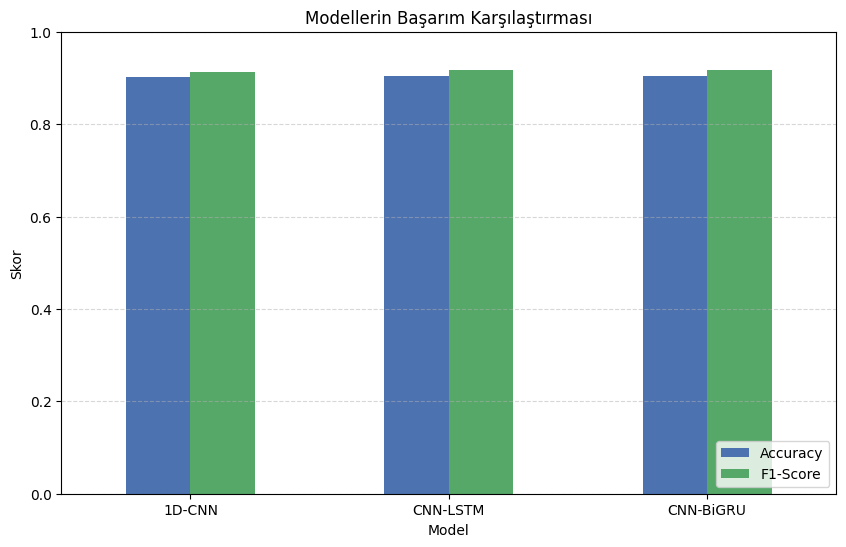

In [ ]:
# --- 6. FİNAL KARŞILAŞTIRMA ---
print("\n" + "="*40)
print("FİNAL KARŞILAŞTIRMA TABLOSU")
print("="*40)
df_results = pd.DataFrame(comparison_table).set_index('Model')
print(df_results)

# Grafiksel Kıyaslama
df_results[['Accuracy', 'F1-Score']].plot(kind='bar', figsize=(10, 6), rot=0, color=['#4c72b0', '#55a868'])
plt.title('Modellerin Başarım Karşılaştırması')
plt.ylim(0, 1.0)
plt.ylabel('Skor')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.show()